In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys

sys.path.append('/home/luban/workspace/观测数据建模/drs/script/models/torch_nn')

In [3]:
df = pd.read_csv('feature_20230331_20230626.csv')
df['gmv_pp'] = df['gmv']/df['user_cnt']
df['subsidy_c_rate'] = df['subsidy_c']/df['gmv']
df['bubble_cnt_pp'] = df['bubble_cnt']/df['user_cnt']
df['compete_call_cnt_pp'] = df['compete_call_cnt']/df['user_cnt']
df['objective_call_cnt_pp'] = df['objective_call_cnt']/df['user_cnt']
df['ans_cnt_pp'] = df['ans_cnt']/df['user_cnt']
df['suc_cnt_pp'] = df['suc_cnt']/df['user_cnt']
df['subsidy_b_rate'] = df['subsidy_b']/df['gmv']
df['business_profit_rate'] = df['business_profit']/df['gmv']
df['online_driver_divide_rate'] = df['online_driver_divide']/df['gmv']
df['order_charge_dis_pp'] = df['order_charge_dis']/df['user_cnt']
df['driver_charge_dis_pp'] = df['driver_charge_dis']/df['user_cnt']
df['log_user_cnt'] = np.log(df['user_cnt'])
df['log_subsidy_b_rate'] = np.log(df['subsidy_b_rate'] + 0.001)
df = df[['dt', 'city_id', 'gmv_pp', 'subsidy_c_rate', 'city_id', 'log_user_cnt', 'log_subsidy_b_rate', 'bubble_cnt_pp', 'compete_call_cnt_pp', 'objective_call_cnt_pp', 'ans_cnt_pp', 'suc_cnt_pp', 'business_profit_rate', 'online_driver_divide_rate', 'order_charge_dis_pp', 'driver_charge_dis_pp']]
df

/home/luban/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,dt,city_id,gmv_pp,subsidy_c_rate,city_id,log_user_cnt,log_subsidy_b_rate,bubble_cnt_pp,compete_call_cnt_pp,objective_call_cnt_pp,ans_cnt_pp,suc_cnt_pp,business_profit_rate,online_driver_divide_rate,order_charge_dis_pp,driver_charge_dis_pp
0,2023-05-24,235,15.159652,3.459076e-07,235,8.651899,-4.652097,4.181612,1.323370,1.276001,1.285265,1.215172,0.169082,0.788366,5115.383674,5114.153120
1,2023-05-24,50,7.350955,3.433858e-01,50,5.874931,-6.152609,3.766854,1.207865,1.207865,1.207865,1.154494,-0.163383,0.792716,2356.123596,2356.151685
2,2023-05-24,53,28.588000,2.048202e-01,53,5.298317,-6.008983,3.970000,1.145000,1.130000,1.110000,1.055000,0.139401,0.627854,12407.050000,12407.300000
3,2023-05-24,7,63.540840,1.125161e-01,7,4.779123,-5.413706,7.176471,2.487395,2.445378,2.336134,2.235294,0.159409,0.690701,20215.210084,20215.210084
4,2023-05-24,9,57.159256,1.644890e-01,9,4.795791,-5.676737,7.900826,2.421488,2.404959,2.404959,2.264463,0.109862,0.690462,22845.950413,22844.793388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873311,2023-06-21,36,55.459276,5.247034e-02,36,5.717028,-2.612741,7.440789,2.730263,2.667763,2.444079,2.167763,0.101418,0.737668,16232.072368,16230.592105
873312,2023-06-21,18,41.557297,3.484953e-01,18,4.709530,-1.734221,7.873874,2.162162,2.099099,1.810811,1.576577,-0.267223,0.718433,14087.657658,14086.936937
873313,2023-06-21,253,24.146159,2.785767e-01,253,5.017280,-3.202105,4.139073,1.172185,1.165563,1.139073,1.046358,0.000390,0.656079,8640.662252,8641.390728
873314,2023-06-21,254,26.276154,1.349571e-02,254,4.644391,-2.385268,7.288462,2.461538,2.461538,2.192308,2.057692,0.140705,0.720520,9109.519231,9107.788462


In [4]:
import model_config as conf
from log_prior_nn import LogPriorNN, Estimator

model = LogPriorNN(conf)
estimator = Estimator(df, model, conf)
estimator.run()

log_user_cnt_s 0.0 100.0
log_subsidy_b_rate_s 0.0 100.0
bubble_cnt_pp_s 0.0 100.0
compete_call_cnt_pp_s 0.0 100.0
objective_call_cnt_pp_s 0.0 100.0
ans_cnt_pp_s 0.0 100.0
suc_cnt_pp_s 0.0 100.0
business_profit_rate_s 0.0 100.0
online_driver_divide_rate_s 0.0 100.0
order_charge_dis_pp_s 0.0 100.0
driver_charge_dis_pp_s 0.0 100.0
log_user_cnt -0.9945055259685315 6.530504097917706
log_subsidy_b_rate -8.287999352608924 3.830718828416288
bubble_cnt_pp -3.0164675918110846 4.597715480357612
compete_call_cnt_pp -1.642154840906784 6.4842779250385965
objective_call_cnt_pp -2.761497351466181 6.541717501697806
ans_cnt_pp -2.2245228653379128 6.025562716526072
suc_cnt_pp -1.9668987085363319 5.857118276620162
business_profit_rate -14.613292093750756 2.8127311531941053
online_driver_divide_rate -4.521499413806285 4.731823762796734
order_charge_dis_pp -1.6783753973960667 5.961839349008133
driver_charge_dis_pp -1.6783052988286895 5.960808159844769
loss: 1965.051880  [ 5120/21064]
loss: 1717.517090  [102

KeyboardInterrupt: 

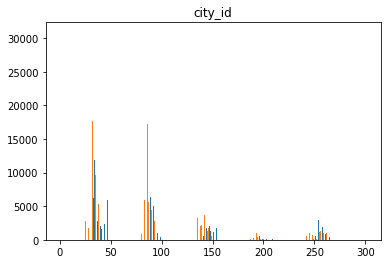

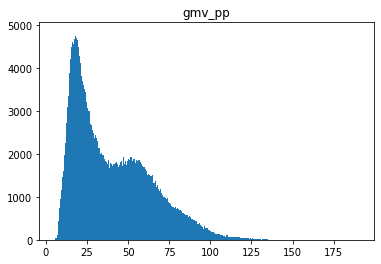

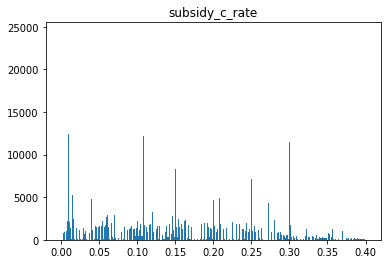

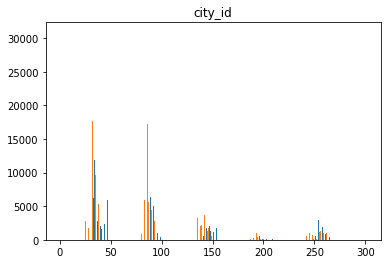

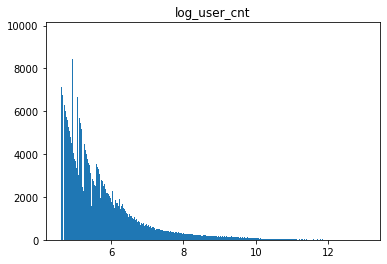

/home/luban/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/luban/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


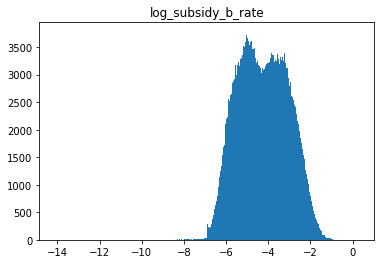

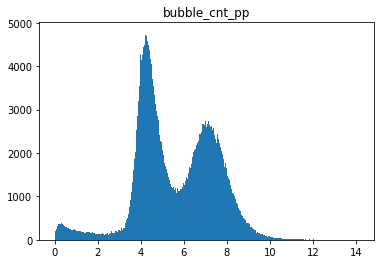

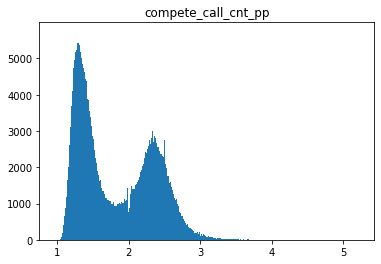

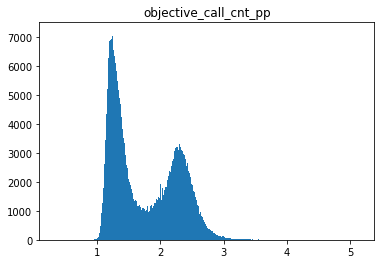

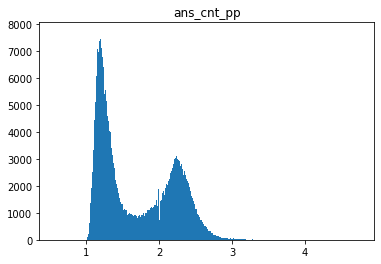

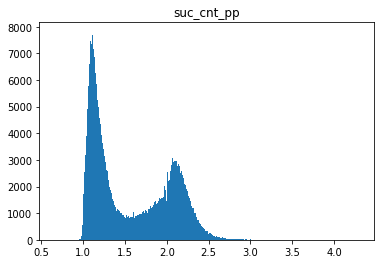

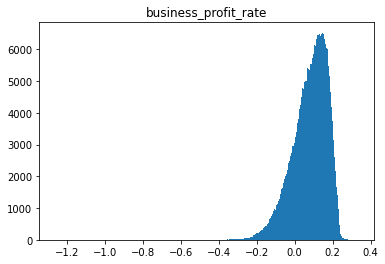

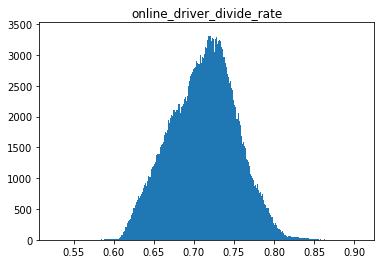

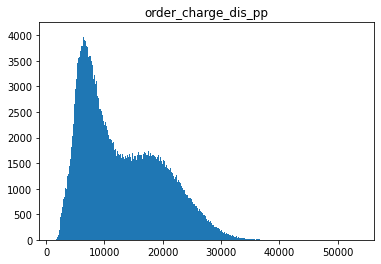

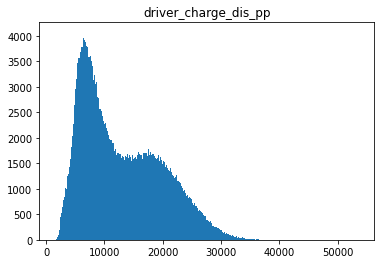

In [7]:
import matplotlib.pyplot as plt

for f in ['city_id', 'gmv_pp', 'subsidy_c_rate', 'city_id', 'log_user_cnt', 'log_subsidy_b_rate', 'bubble_cnt_pp', 'compete_call_cnt_pp', 'objective_call_cnt_pp', 'ans_cnt_pp', 'suc_cnt_pp', 'business_profit_rate', 'online_driver_divide_rate', 'order_charge_dis_pp', 'driver_charge_dis_pp']:
    plt.hist(df[f], bins=1000)
    plt.title(f)
    plt.show()